# 4.9  Lesson - Data Visualization with Python

## Contents
### Import Libraries and assign Path
### Import ords-prods-merge DF
### Plot bar chart of oders_day_of_week
### Create histogram of prices
### Sampling Data
### Line chart of sample dataset: orders_day_of_week vs prices
### Export updated df

# Import Libraries and assign Path

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# assign path
path = r'C:\Users\jkbar\OneDrive\CareerFoundry\Instacart Basket Analysis'

# Import ords-prods-merge DF

In [3]:
# import dataframe
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

# Plot bar chart of oders_day_of_week

<Axes: xlabel='orders_day_of_week'>

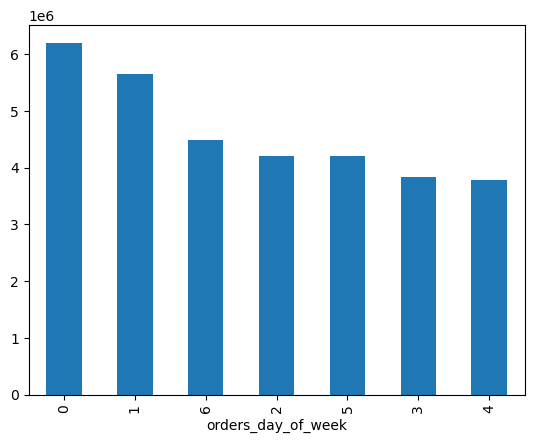

In [8]:
# plot bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

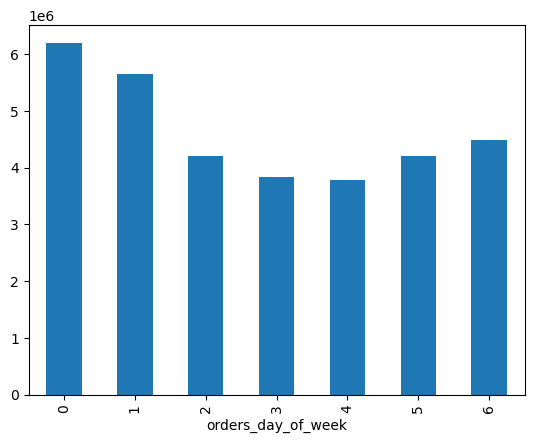

In [10]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

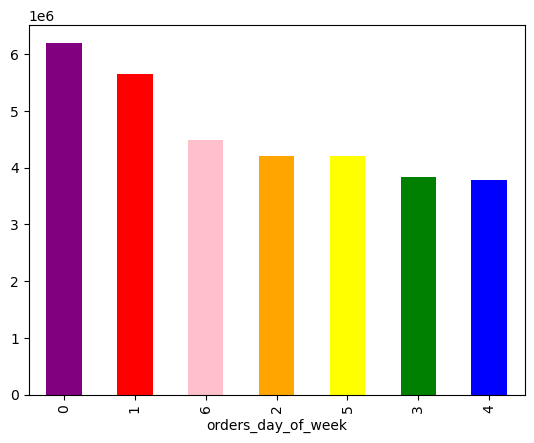

In [48]:
bar =ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple','red','pink','orange','yellow','green','blue'])

In [50]:
# export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Create histogram of prices

<Axes: ylabel='Frequency'>

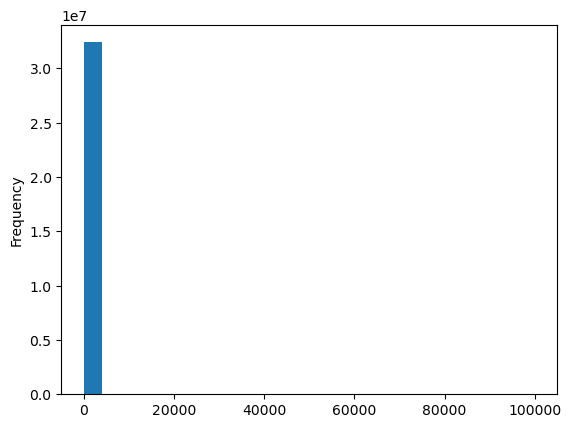

In [52]:
# create histograms
ords_prods_merge['prices'].plot.hist(bins = 25)

In [54]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [58]:
ords_prods_merge['prices'].mean()

11.980225638383445

In [60]:
ords_prods_merge['prices'].median()

7.4

In [62]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

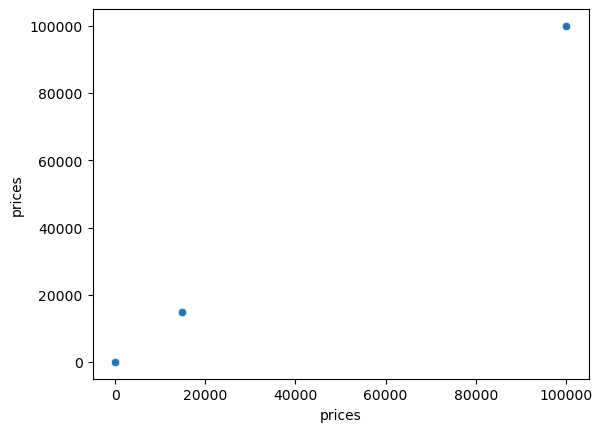

In [64]:
# create scatterplot
sns.scatterplot(x='prices',y='prices',data=ords_prods_merge)

In [66]:
# check for prices over $100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,busiest_day,busiest_days,busiest_period_of_day,first_order,max_order,loyalty_flag,mean_spend,spender_flag,customer_frequency,frequency_flag
1576,912404,17,prior,12,2,14,5.0,21553,5,0,...,Regularly busy,Regularly busy,Average orders,False,40,Regular customer,108.648299,High_spender,5.0,Frequent Customer
1638,603376,17,prior,22,6,16,4.0,21553,3,1,...,Regularly busy,Regularly busy,Average orders,False,40,Regular customer,108.648299,High_spender,5.0,Frequent Customer
16522,3264360,135,prior,2,2,21,13.0,21553,6,0,...,Regularly busy,Regularly busy,Average orders,False,4,New customer,1154.792308,High_spender,12.0,Regular customer
16528,892534,135,prior,3,0,8,12.0,21553,3,1,...,Busiest day,Busiest days,Average orders,False,4,New customer,1154.792308,High_spender,12.0,Regular customer
53672,229704,342,prior,8,1,19,30.0,21553,9,0,...,Regularly busy,Busiest days,Average orders,False,16,Regular customer,114.426619,High_spender,23.0,Non_frequent_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,prior,18,1,9,7.0,21553,17,1,...,Regularly busy,Busiest days,Average orders,False,25,Regular customer,351.141618,High_spender,6.0,Frequent Customer
32347717,2504315,205818,prior,3,5,15,3.0,21553,13,0,...,Regularly busy,Regularly busy,Average orders,False,25,Regular customer,170.073770,High_spender,13.0,Regular customer
32347727,1108388,205818,prior,5,4,5,1.0,21553,5,1,...,Least busy,Slowest days,Average orders,False,25,Regular customer,170.073770,High_spender,13.0,Regular customer
32380527,1916142,206049,prior,1,2,17,NaN,21553,2,0,...,Regularly busy,Regularly busy,Average orders,True,5,New customer,938.031250,High_spender,7.0,Frequent Customer


In [6]:
# mark prices over $100 as missing
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [9]:
ords_prods_merge['prices'].max()

25.0

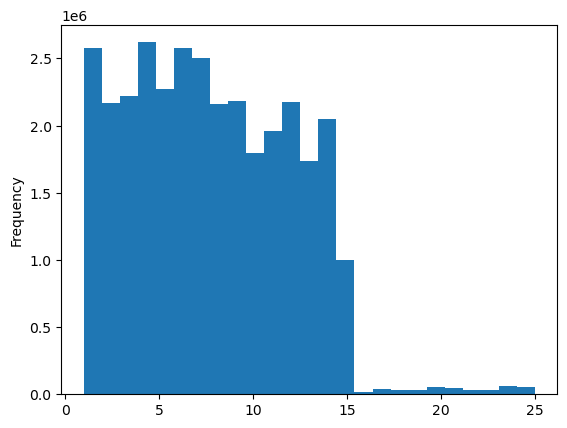

In [72]:
# create Histogram
hist=ords_prods_merge['prices'].plot.hist(bins = 25)

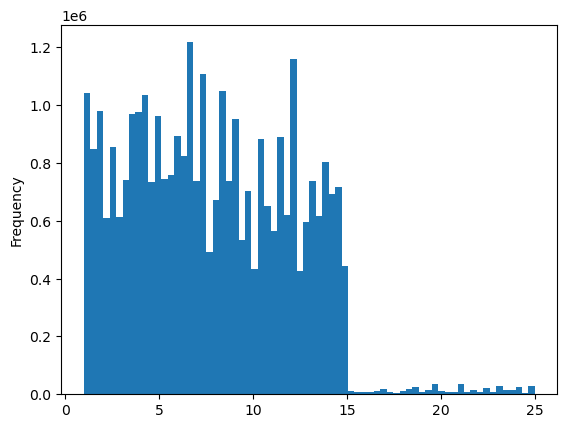

In [78]:
hist_2=ords_prods_merge['prices'].plot.hist(bins = 70)

In [80]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [82]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_70.png'))

# Sampling Data

In [13]:
# setting random numbers
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
# create Big sample df of 70%
big = ords_prods_merge[dev]

In [19]:
# create Small sample df of 30% 
small = ords_prods_merge[~dev]

In [21]:
len(ords_prods_merge)

32404859

In [23]:
len(big)+len(small)

32404859

In [27]:
# create even smaller df
df_2 = small[['orders_day_of_week','prices']]

# Line chart of sample dataset: orders_day_of_week vs prices

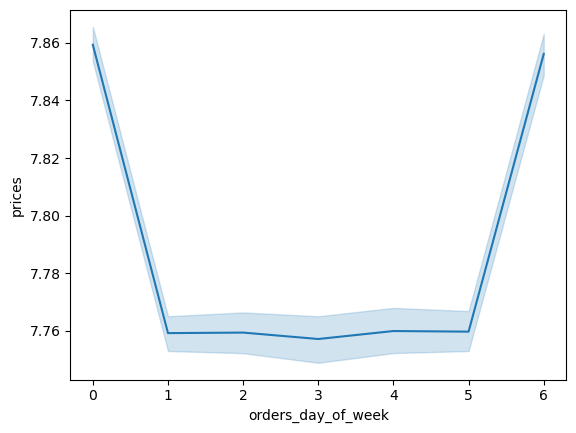

In [29]:
# create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Export updated df

In [31]:
# save changes to ords_prods_merge
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged.pkl'))